In [2]:
from numpy import array,sqrt, argsort, std
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import *
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

<p style="text-align:justify">The dataset I have choosen is the Online News Popularity dataset. It contains 39644 observations of 57 predictive features used to predict a continuous target variable. Each observation refers to an article with 57 characteristics and statistical values used to predict the number of shares of the article.</p>
<p style="text-align:justify">In this Notebook, we are going to first analyse this dataset by doing some data visualization. After processing the dataset, we will contruct some regression models and classifier models in order to predict the response variable "shares". We will then compare both best models among classifiers and regression models to see which one will be performing the best. The metrics used will be the Accuracy for classifiers and RMSE for regression models. </p>

## Importing the Dataset

In [72]:
dataset=pd.read_csv('OnlineNewsPopularity.csv')

In [4]:
dataset.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [5]:
dataset.shape

(39644, 61)

## Data Pre Processing

### Drop Duplicates

In [6]:
dataset=dataset.drop_duplicates()
dataset.shape

(39644, 61)

<p>No duplicate have been found </p>

### Remove space in column names

In [7]:
dataset.columns = dataset.columns.str.lstrip()
dataset.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

### Drop Non Predictive Variables

<p style="text-align:justify">
    According to the dataset description, the non predictive variables are <strong>URL</strong> and <strong>TIMEDELTA</strong>.
</p>

In [8]:
dataset=dataset.drop(['url','timedelta'],axis=1)
pd.set_option("display.max_rows", None, "display.max_columns", None)
dataset.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


### Drop Missing values

In [9]:
dataset=dataset.dropna()
dataset.shape

(39644, 59)

<p>No missing values have been found</p>

## Data Exploration

<p style="text-align:justify">The main objective of this section is the explore the dataset by analysing the features, searching some potential correlations between them. I will plot and describe each notable information that I'll find concerning this dataset</p>

### Features Summary

In [10]:
dataset.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448566,639.000000,1100.000000,981.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025051,0.025012,0.028571,0.028571,0.028574,0.396167,0.057757,0.028384,0.009615,0.600000,0.185185,0.306

<p> We can see that the ranges for each feature are very sparse : it will be important to scale the dataset before buiding some models. It is important to highlight that the target variable is not linearly distributed at all. We will show its distritbution later.</p>

### Correlation Matrix

<p style="text-align:justify">The first interesting vizualisation that can be made is a correlation matrix of the dataset. Using the <strong>Pearson Method</strong>, the correlation matrix gives us information about which variables will be correlated each others, this way we would be able to identify some positive/negative linear relations between pairs of features.</p>

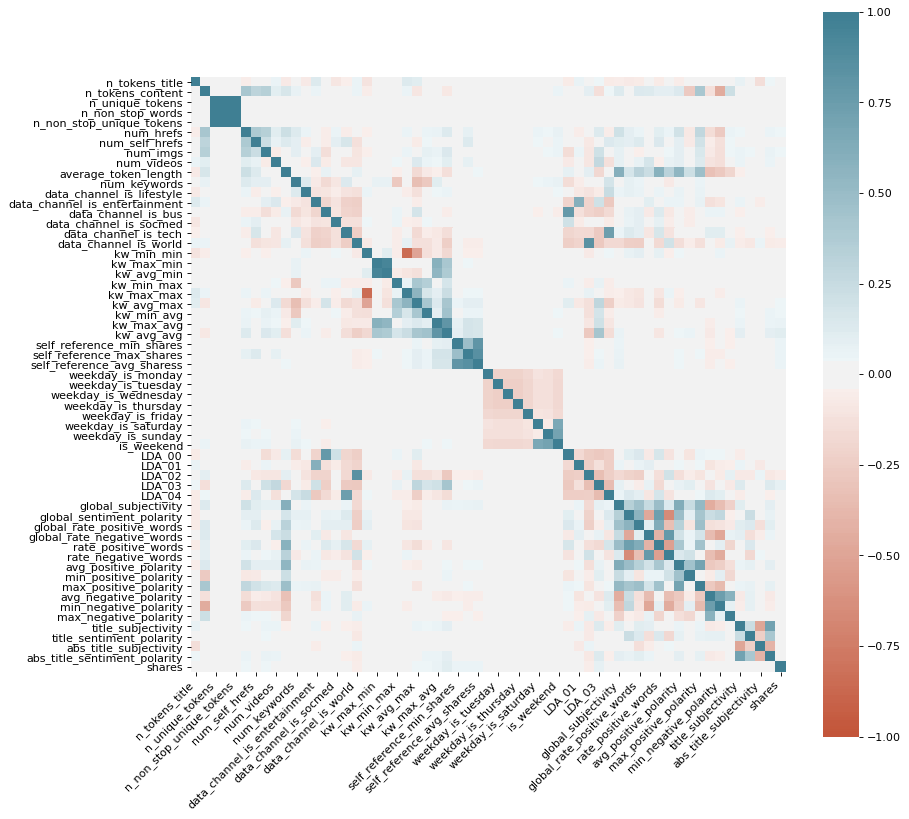

In [11]:
figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
corr = dataset.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

<p style="text-align:justify">We can see from this correlation matrix that the number of unique words, the number of non stop words and the number of unique non stop words are highly positively correlated. The following plots confirms these assumptions </p>

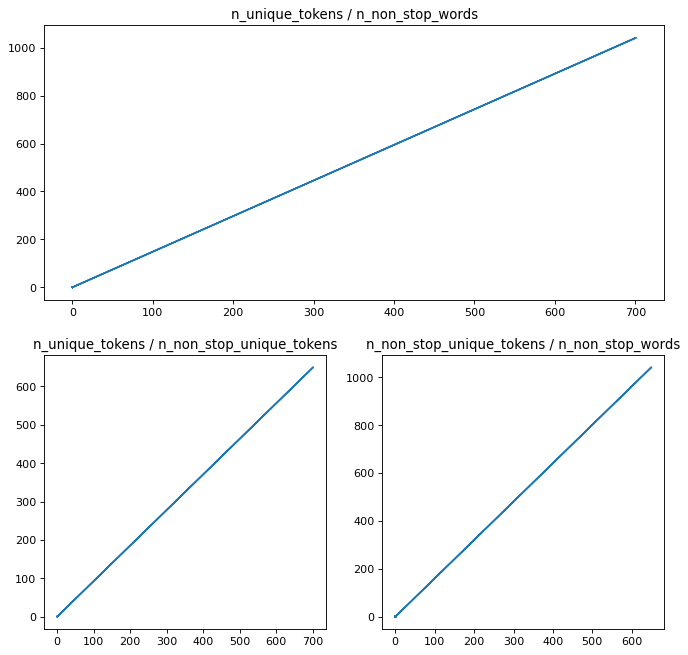

In [12]:
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(2,1,1)
plt.plot(dataset['n_unique_tokens'], dataset['n_non_stop_words'])
plt.title('n_unique_tokens / n_non_stop_words')

plt.subplot(2,2,3)
plt.plot(dataset['n_unique_tokens'], dataset['n_non_stop_unique_tokens'])
plt.title('n_unique_tokens / n_non_stop_unique_tokens')

plt.subplot(2,2,4)
plt.plot(dataset['n_non_stop_unique_tokens'], dataset['n_non_stop_words'])
plt.title('n_non_stop_unique_tokens / n_non_stop_words')
plt.show()

<p style="text-align:justify">The kw_avg min and kw max min seem to be highly correlated too. Moreover, the kw max max and kw min min seem to be highly negatively correlated. We can plot theses features together to see how much these features are linearly dependant.</p>

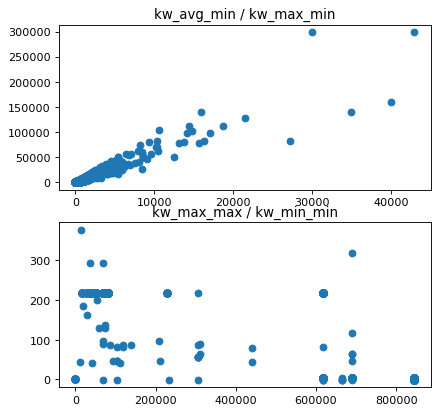

In [13]:
figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(2,1,1)
plt.plot(dataset['kw_avg_min'], dataset['kw_max_min'], 'o')
plt.title('kw_avg_min / kw_max_min')

plt.subplot(2,1,2)
plt.plot(dataset['kw_max_max'], dataset['kw_min_min'],'o')
plt.title('kw_max_max / kw_min_min')
plt.show()

<p style="text-align:justify">We can conclude from these plots that kw avg min and kw max min are highly correlated, and that the number of unique words, the number of non stop words and the number of unique non stop words are highly correlated too. To avoid overfitting, we will remove some of these variable before building prediction models </p>

### Distribution of shares target variable

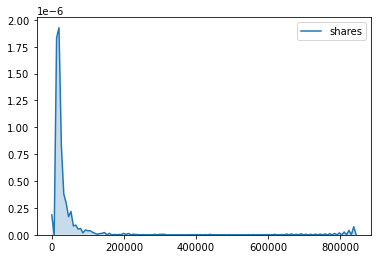

Skew of the Shares Target Variable 33.96388487571415


In [14]:
sns.kdeplot(dataset['shares'], shade=True)
plt.show()
print('Skew of the Shares Target Variable',dataset['shares'].skew(axis=0))

<p style="text-align:justify">We can see from this density plot that an extremely vast majority of the articles have been shared less that 100k times. We can vizualize some dependency between each feature and the target feature number of shares by categorizing this variable into 2 classes </p>

<p style="text-align:justify">It is important to highlight the fact that The Shares Target Feature is very right skewed. Some Processing of this feature would help to improve future model fitting. To decrease the skew of this variable we could apply a non linear modification on the variable which will be stronger on high values. We are going to try with :
<ul>
  <li>Sqrt</li>
  <li>Log</li>
  <li>Log2</li>
  <li>Log10</li>
</ul>
</p>

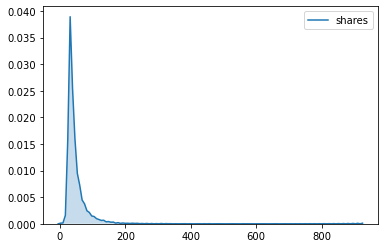

Skew of the SQRT of the Shares Target Variable :  5.540430623907007


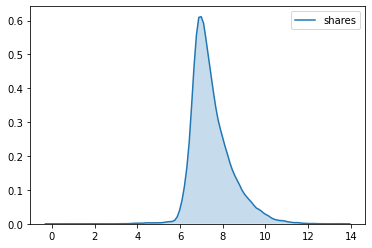

Skew of the LOG of the Shares Target Variable :  1.017799445530757


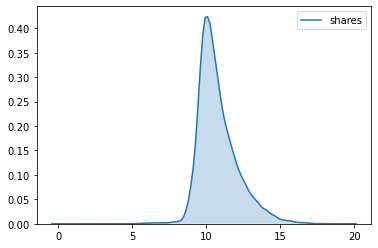

Skew of the LOG2 of the Shares Target Variable :  1.0177994455307589


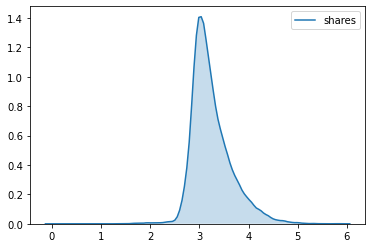

Skew of the LOG10 of the Shares Target Variable :  1.0177994455307584


In [15]:
sns.kdeplot(np.sqrt(dataset['shares']), shade=True)
plt.show()
print('Skew of the SQRT of the Shares Target Variable : ',np.sqrt(dataset['shares']).skew(axis=0))
sns.kdeplot(np.log(dataset['shares']), shade=True)
plt.show()
print('Skew of the LOG of the Shares Target Variable : ',np.log(dataset['shares']).skew(axis=0))
sns.kdeplot(np.log2(dataset['shares']), shade=True)
plt.show()
print('Skew of the LOG2 of the Shares Target Variable : ',np.log2(dataset['shares']).skew(axis=0))
sns.kdeplot(np.log10(dataset['shares']), shade=True)
plt.show()
print('Skew of the LOG10 of the Shares Target Variable : ',np.log10(dataset['shares']).skew(axis=0))

<p>Applying log on the target variable helped to decrease the skew of it. We will use this data processing before building models.</p>

### Distribution of some Features regarding to the shares classes

<p>We can visualize the distribution of some interesting features regarding to the popularity of the article. I have selected the features that seem to have the larger impact on the target variable</p>

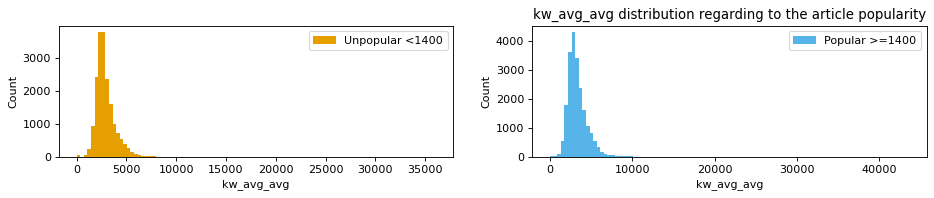

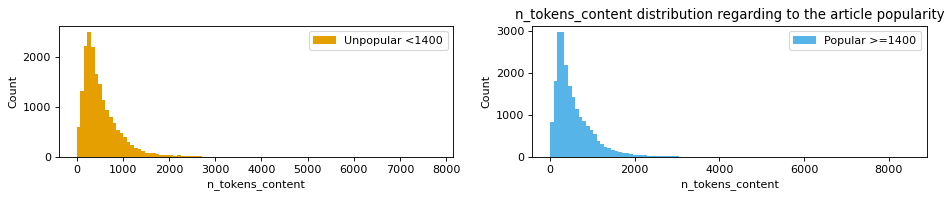

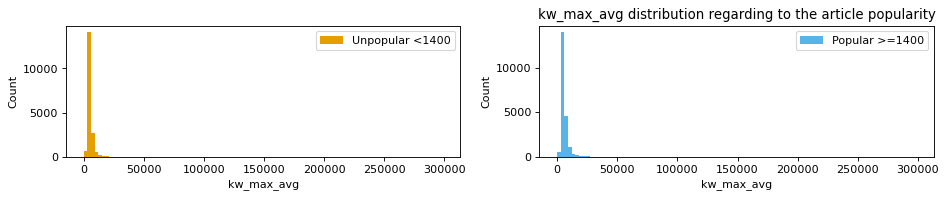

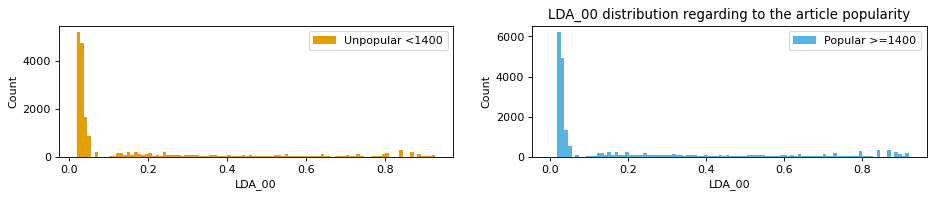

In [16]:
for feature in ['kw_avg_avg','n_tokens_content','kw_max_avg','LDA_00']:
    x1 = list(dataset[dataset['shares'] < 1400][feature])
    x2 = list(dataset[dataset['shares'] >= 1400][feature])
    x=[x1,x2]
    colors = ['#E69F00', '#56B4E9']
    names = ['Unpopular <1400', 'Popular >=1400']
    figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
    for i in range(len(x)):
        plt.subplot(4,len(x),i+1)
        plt.hist(x[i],bins=100,
             color = colors[i], label=names[i])
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.legend()
    plt.title(f'{feature} distribution regarding to the article popularity')
    plt.show()

<strong>Variables KW_AVG_AVG & KW_MAX_AVG</strong><br>
We can see that popular articles have generally higher average number of keywords than unpopular articles.<br><br>
<strong>Variable N_TOKENS_CONTENTS</strong><br>
The number of words in the content is a little bit higher in popular articles.<br><br>
<strong>Variable LDA_00</strong><br>
The Latent Dirichlet Allocation is a NLP model which is used to see if some documents are related to the same topic. Here, popular articles are a little bit more close to the "topic 0" than unpopular articles. <br><br>

### Ditribution of some Features regarding to the shares classes using boxplots

<p> We can also visualize the distribution from the center for each features, regarding to the shares classes. These plots gives us some information on how the data is distributed among quartiles. </p>

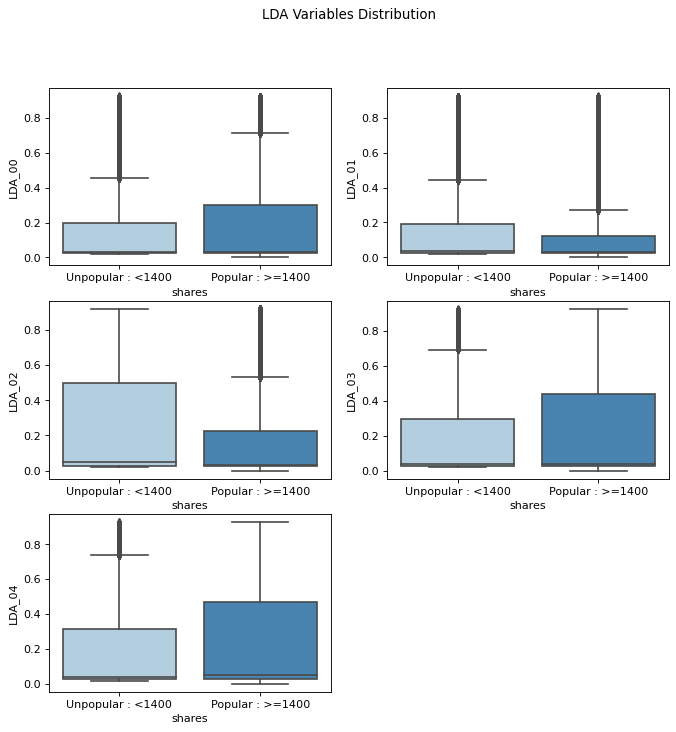

In [17]:
features=['LDA_00','LDA_01','LDA_02','LDA_03','LDA_04']
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
for i in range(len(features)):
    plt.subplot(3,2,i+1)
    sns.boxplot( x=pd.Series(dataset["shares"]>=1400).replace(True,'Popular : >=1400').replace(False,'Unpopular : <1400'), y=dataset[features[i]], palette="Blues")
plt.suptitle('LDA Variables Distribution')
plt.show()
    

<p>From these boxplots, we can see that popular articles are more likely to be close to topics 0,3 and 4. Popular articles are more likely to be close to topics 1 and 2.</p>

### Interaction between some features and the target variable

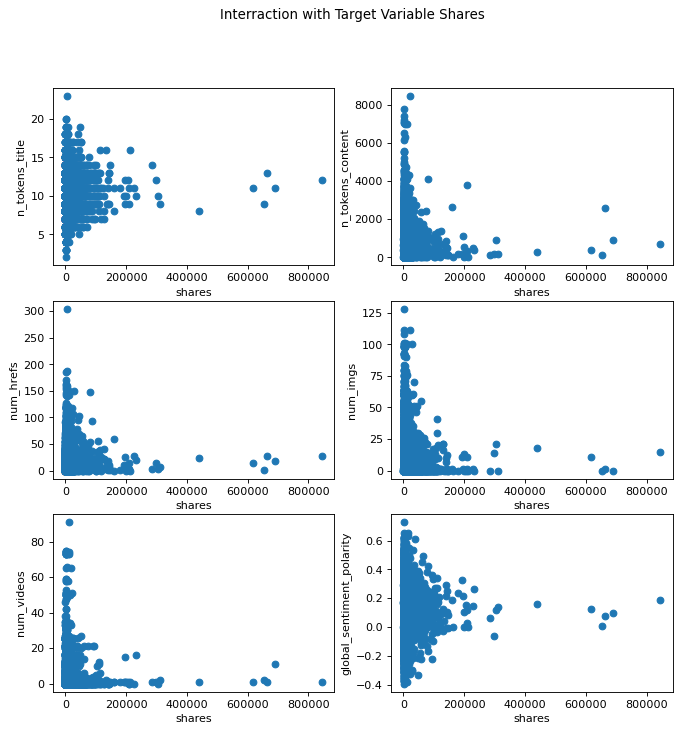

In [18]:
variables=['n_tokens_title','n_tokens_content','num_hrefs','num_imgs','num_videos','global_sentiment_polarity']
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
for i in range(len(variables)):
    plt.subplot(3,2,i+1)
    plt.plot(dataset['shares'],dataset[variables[i]],'o')
    plt.ylabel(variables[i])
    plt.xlabel('shares')
plt.suptitle('Interraction with Target Variable Shares')
plt.show()

<strong>How to write a popular article ?</strong><br><br>
<p style='text-align:justify'>Some assumptions can be made from these plots. Generally, 10 as the number of words in the title helps to make this article popular. Moreover, the number of words of this article should not be too high : less than 2000 seems to be a good choice. The number of links should not be to high : between 0 to 20 is a good choice. Concerning the photos and videos, the number should not be too high : generally, articles with a low number of these medias are more shared. Finally the sentiments of the writer should be neutral : not too positive and not too negative.</p>

### Topics of the articles

<p>In this section, we are going to see the topic used for both popular and unpopular articles to see if some of them leads to a larger number of shares.</p>

In [42]:
popular=dataset[dataset['shares']>1400]
unpopular=dataset[dataset['shares']<=1400]
freq_popular=[]
freq_unpopular=[]
for i in ['data_channel_is_lifestyle','data_channel_is_entertainment','data_channel_is_bus','data_channel_is_socmed','data_channel_is_world','data_channel_is_tech']:
    freq_popular.append(popular[popular[i]==1].shape[0]/popular.shape[0])
    freq_unpopular.append(unpopular[unpopular[i]==1].shape[0]/unpopular.shape[0])
freq_popular.append(1-sum(freq_popular))
freq_unpopular.append(1-sum(freq_unpopular))
labels=['Lifestyle','Entertainment','Bus','Socmed','World','Tech','Other']

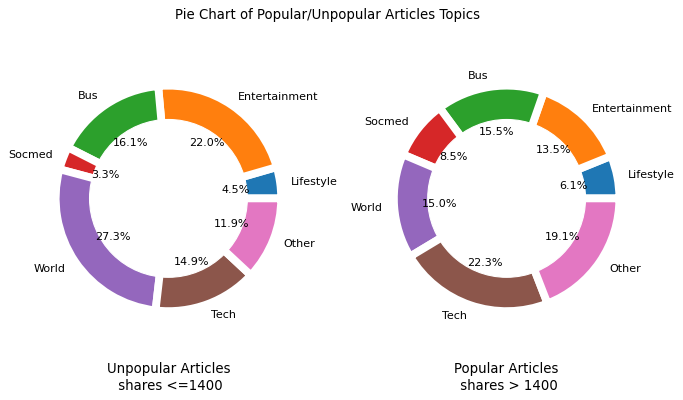

In [62]:
figure(num=None, figsize=(10, 5), dpi=80)
plt.subplot(1,2,1)
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(freq_unpopular, labels=labels,wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' },autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Unpopular Articles\n shares <=1400',y=-0.2)
plt.subplot(1,2,2)
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(freq_popular, labels=labels,wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' },autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Popular Articles\n shares > 1400',y=-0.2)
plt.suptitle('Pie Chart of Popular/Unpopular Articles Topics')
plt.show()

<p>From both pie charts, we can assume that some topics help to increase the popularity of an article. Topics related to Technologies and "other" topics (not in this batch of topics) seem to be more shared. Moreover, comparing with the unpopular articles pichart, avoiding World and Entertainment topics would help</p>

### Release week day of the article

In [70]:
popular=dataset[dataset['shares']>1400]
unpopular=dataset[dataset['shares']<=1400]
freq_popular=[]
freq_unpopular=[]
for i in ['weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday','weekday_is_saturday','weekday_is_sunday']:
    freq_popular.append(popular[popular[i]==1].shape[0]/popular.shape[0])
    freq_unpopular.append(unpopular[unpopular[i]==1].shape[0]/unpopular.shape[0])
labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

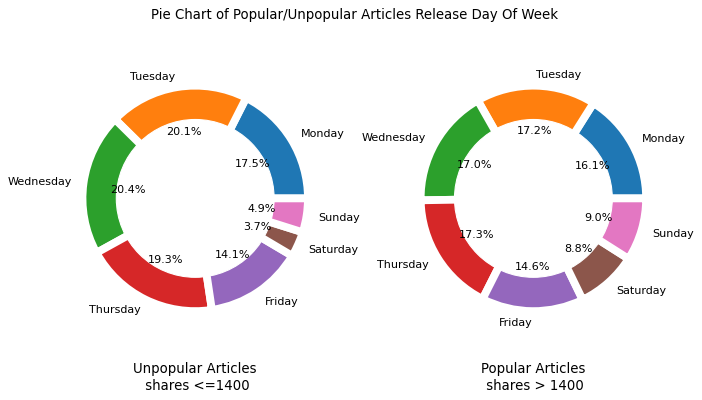

In [71]:
figure(num=None, figsize=(10, 5), dpi=80)
plt.subplot(1,2,1)
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(freq_unpopular, labels=labels,wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' },autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Unpopular Articles\n shares <=1400',y=-0.2)
plt.subplot(1,2,2)
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(freq_popular, labels=labels,wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' },autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Popular Articles\n shares > 1400',y=-0.2)
plt.suptitle('Pie Chart of Popular/Unpopular Articles Release Day Of Week')
plt.show()

<p>Comparing both pie-chart, we can see that there isn't a big difference between them. Nevertheless, knowing that the number of observation per class is almost the same, releasing an article the week-end would help to be more shared.</p>

## Data Ingeniering

### Features Removing

<p>As we have seen before, some features have to be removed in order to avoid overfitting. These features are the number of unique words, the number of non stop words and the kw avg min.</p>


In [9]:
dataset=dataset.drop(['kw_avg_min','n_unique_tokens','n_non_stop_words'],axis=1)
dataset.shape

(39644, 56)

### Categorization Of The Target Variable Shares

<p style="text-align:justify">In this study, we will compare the performance between regression and classification tasks on this dataset. To do such comparisons, we will use both RMSE and R² to evaluate the performance and how much a model fit to the data for regression tasks and accuracy to evaluate performance of classifiers.
Hence, we will create a boolean feature representing either a article is popular (shares>=1400) or non popular (shares&lt;1400). This variable will be used to fit classifiers on the dataset.</p>
<p>This categorization will also help us to do some interesting data vizualisation on the dataset</p>

In [10]:
dataset['sharesBool']=dataset['shares']>=1400
dataset.head()

,n_tokens_title,n_tokens_content,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,sharesBool
0,12.0,219.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,False
1,9.0,255.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,False
2,9.0,211.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,True
3,9.0,531.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,False
4,13.0,1072.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,False


### Dataset Splitting

In [11]:
train,test=train_test_split(dataset,test_size=0.2,random_state=0)

In [12]:
train_Y=train['shares']
train_Y_bool=train['sharesBool']
train_X=train.drop(['shares','sharesBool'],axis=1)
test_Y=test['shares']
test_Y_bool=test['sharesBool']
test_X=test.drop(['shares','sharesBool'],axis=1)
print(train_Y.shape)
print(train_X.shape)
print(test_Y.shape)
print(test_X.shape)

(31715,)
(31715, 55)
(7929,)
(7929, 55)


## Building Regression Models

### Linear Regression

<p>The first model we are going to build is a Linear Regression Model. Linear Regression uses Ordinary Least Squares Technique to find the optimal coefficients that fit the most to the data.</p>

In [30]:
reg_model = LinearRegression()
reg_model.fit(train_X, train_Y)
pred_reg_model=reg_model.predict(test_X)
mse_reg_model=mse(test_Y,pred_reg_model)
print('RMSE : ',sqrt(mse_reg_model))
print('R² :',reg_model.score(test_X,test_Y))

RMSE :  9305.030073441902
R² : -0.13769634890760551


<p>We can see that the model is not fitting at all to the data, a negative R² meaning that the mean of the training set differs a lot from the mean of the test set. We can try to reduce the skew of the response variable to see if results will be better</p>

In [31]:
reg_model_log = LinearRegression()
reg_model_log.fit(train_X, np.log(train_Y))
pred_reg_model_log=reg_model_log.predict(test_X)
mse_reg_model_log=mse(test_Y,np.exp(pred_reg_model_log))
print('RMSE : ',sqrt(mse_reg_model_log))
print('R² :',reg_model_log.score(test_X,np.log(test_Y)))

RMSE :  10205.55608618723
R² : -1.4818141395089435


<p>We can see that the results are worse, let's plot both predictions to compare them</p>

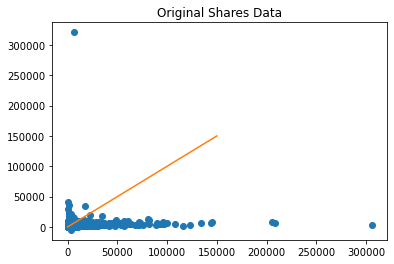

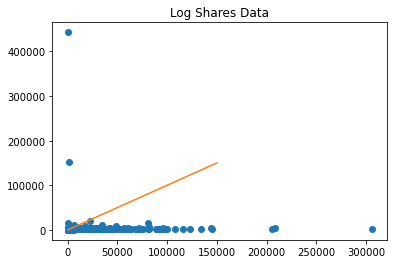

In [15]:
plt.plot(test_Y,pred_reg_model,'o')
plt.plot([0,150000],[0,150000],'-')
plt.title('Original Shares Data')
plt.show()
plt.plot(test_Y,np.exp(pred_reg_model_log),'o')
plt.plot([0,150000],[0,150000],'-')
plt.title('Log Shares Data')
plt.show()


<p>We now understand why the R² metrics was terribly low. We could try to scale the data, but as we will build some decision tree based models, RMSE would be improved.</p>

### Decision Tree

<p>For decision tree based models, there is no need to scale the data, as the model uses the relative positions of the points from each others. Applying any monotonic transformation (as scaling) on the whole dataset won't change the way the decision trees will be constructed </p>

In [16]:
tree_model = DecisionTreeRegressor(max_depth=4)
tree_model_log = DecisionTreeRegressor(max_depth=4)
tree_model.fit(train_X, train_Y)
tree_model_log.fit(train_X, np.log(train_Y))

# Predict
pred_tree_model = tree_model.predict(test_X)
pred_tree_model_log = tree_model_log.predict(test_X)
mse_tree_model = mse(test_Y,pred_tree_model)
mse_tree_model_log = mse(test_Y,np.exp(pred_tree_model_log))

print('RMSE of the tree with original data: ',sqrt(mse_tree_model))
print('RMSE of the tree with log target data: ',sqrt(mse_tree_model_log))

RMSE of the tree with original data:  11407.040835192807
RMSE of the tree with log target data:  8782.911855872931


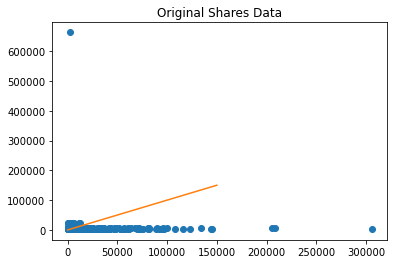

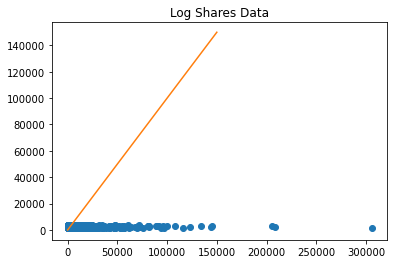

In [17]:
plt.plot(test_Y,pred_tree_model,'o')
plt.plot([0,150000],[0,150000],'-')
plt.title('Original Shares Data')
plt.show()
plt.plot(test_Y,np.exp(pred_tree_model_log),'o')
plt.plot([0,150000],[0,150000],'-')
plt.title('Log Shares Data')
plt.show()

<p style="text-align:justify"> We can see that the single decision tree does not perform much better than the linear regression model</p>


#### Visualization of  the obtained trees :

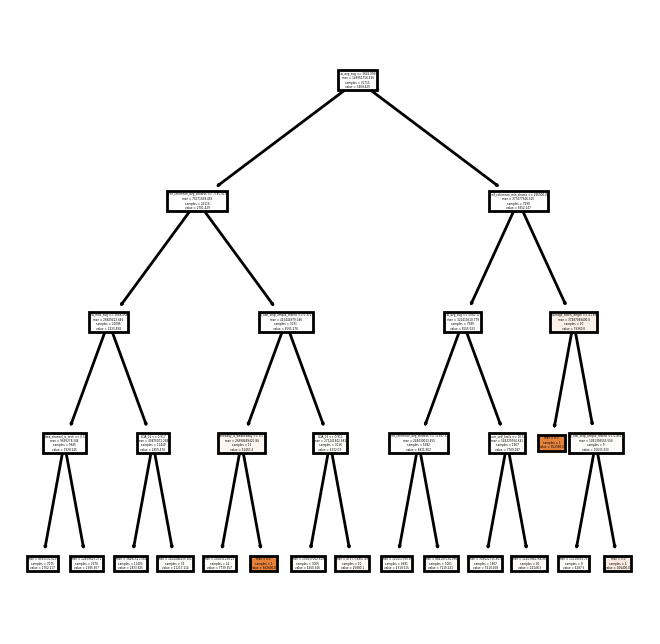

In [18]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=200)
plot_tree(tree_model,feature_names=train_X.columns,filled=True)
plt.show()

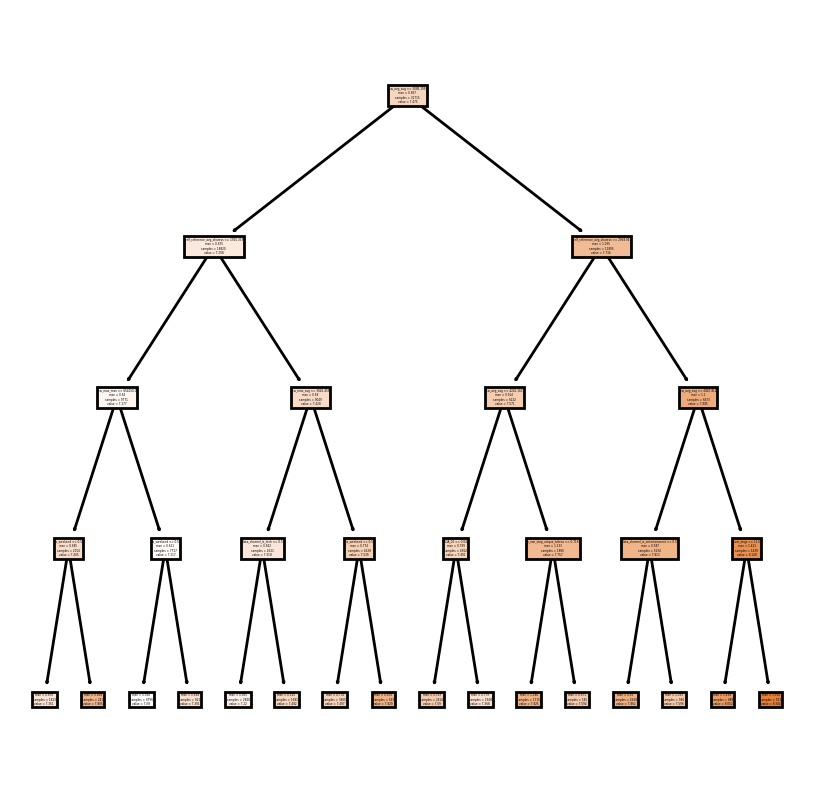

In [19]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=200)
plot_tree(tree_model_log,feature_names=train_X.columns,filled=True)
plt.show()


### Bagging Model

<p> We are now going to compute a bagging model. Bagging is a very interesting model as it computes a large number of trees  in order to reduce the variance of each single tree by averaging them. Bagging is very close to random forests : the main difference between them is the number of feature selected to compute each single tree. For bagging, we first try with all features.</p>

In [20]:
maxFeatures=train_X.shape[1]
bagging_model=BaggingRegressor(n_estimators=100,max_features=maxFeatures, bootstrap=True,oob_score=True)
bagging_model.fit(train_X,train_Y)
pred_bagging=bagging_model.predict(test_X)
bagging_model_mse=mse(test_Y,pred_bagging)
print('RMSE For Bagging Model : ',sqrt(bagging_model_mse))

RMSE For Bagging Model :  9147.903236022295


<p>The RMSE here is higher than for the single decision tree. It could be explained by the randomized decision tree creations, which leads to different results each time we fit the model </p>
<br>We are now going to build a random forest to see if we get a better RMSE

### Random Forest Model

<p> Random Forest is a better way to compute decisions trees than bagging. It differs by the number of features that will be used to compute each single tree. In this case, we select only a small number of features (squared root of the total number of features) to reduce the variance </p>

In [21]:
rf_model=RandomForestRegressor(n_estimators=200, criterion='mse',  
                                    max_features='auto', bootstrap=True,oob_score=True)
rf_model.fit(train_X,train_Y)
pred_rf=rf_model.predict(test_X)
rf_model_rmse=mse(test_Y,pred_rf)
print('RMSE For Random Forest Model : ',sqrt(rf_model_rmse))

RMSE For Random Forest Model :  9061.58556031873


<p>We can visualize which features have a significant impact on the target variable using a feature importance plot</p>

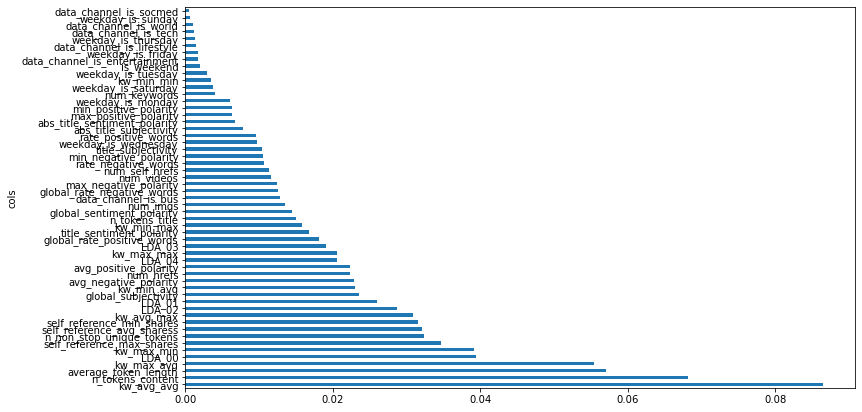

In [22]:
pd.DataFrame({'cols':train_X.columns, 'imp':rf_model.feature_importances_}).sort_values(
    'imp',ascending=False).plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

<p> The last six features here contributes to a rate of 45% for predicting the target variable. </p>

<p>The Random forest model performed better than the bagging model. We can try to tune the parameters in order to maximize the performance of the regressor</p>

### Random Forest Tuning

<p style="font-style:justify">To tune the Random Forest Classifier, we have to set for each hyperparameter the range of values we want to try. Using a k-fold cross validation, we will able to find the hyperparameters that leads to the best RMSE for our dataset</p>

#### Setting up the Grid

In [94]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2, 4]
bootstrap = [True]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500], 'max_features': ['log2', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True]}


#### Model Fitting

<p>Here, we have to select the number of iteration to perform (which is in fact the number of hyperparameters combinations to try) and the number of folds to use for cross validation. To achieve the higher performance, we have to set this parameters as high as possible, but it leads to a high computational time. Here the trade off we have choosen is n_iter=30 and 3-fold cv.</p>

In [95]:
rf_regressor = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf_regressor, param_distributions = random_grid, n_iter = 30, cv = 3, verbose=2, random_state=0, n_jobs = -1)
rf_random.fit(train_X, train_Y_bool)
print('Best Parameters Found for the Random Forest Classifier')
print(rf_random.best_params_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  4.7min finished


Best Parameters Found for the Random Forest Classifier
{'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': True}


<p>Now we have and idea of the optimal parameters, we can now concentrate our search. We will use the grid search cv to check each combinations to find the best parameters.</p>

In [97]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20, 30],
    'max_features': ['log2'],
    'min_samples_leaf': [4],
    'min_samples_split': [5],
    'n_estimators': [400, 500]
}
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(train_X, train_Y_bool)
print('Best Parameters Found for the Random Forest Classifier :')
print(grid_search.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:  1.4min remaining:   32.4s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.8min finished


Best Parameters Found for the Random Forest Classifier :
{'bootstrap': True, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 400}


<p>Now we have to optimal parameters, let's re-build the model to see if the RMSE has been improved</p>

In [23]:
best_params={'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 400}
rf_model_tuned=RandomForestRegressor(**best_params,oob_score=True)
rf_model_tuned.fit(train_X,train_Y)
pred_rf_tuned=rf_model_tuned.predict(test_X)
rf_model_rmse_tuned=mse(test_Y,pred_rf_tuned)
print('RMSE For Tuned Random Forest Regressor : ',sqrt(rf_model_rmse_tuned))

RMSE For Tuned Random Forest Regressor :  8553.932156328528


<p>Tuning the random forest helped to significantly improve the RMSE.</p>

### Regressors Comparison

<p>In this part, we are going to compare the different models. To do so, we will first plot the predicted response vs real target variables of the test set for each model.</p>

Text(0.5, 0.98, 'Comparing Predictions')

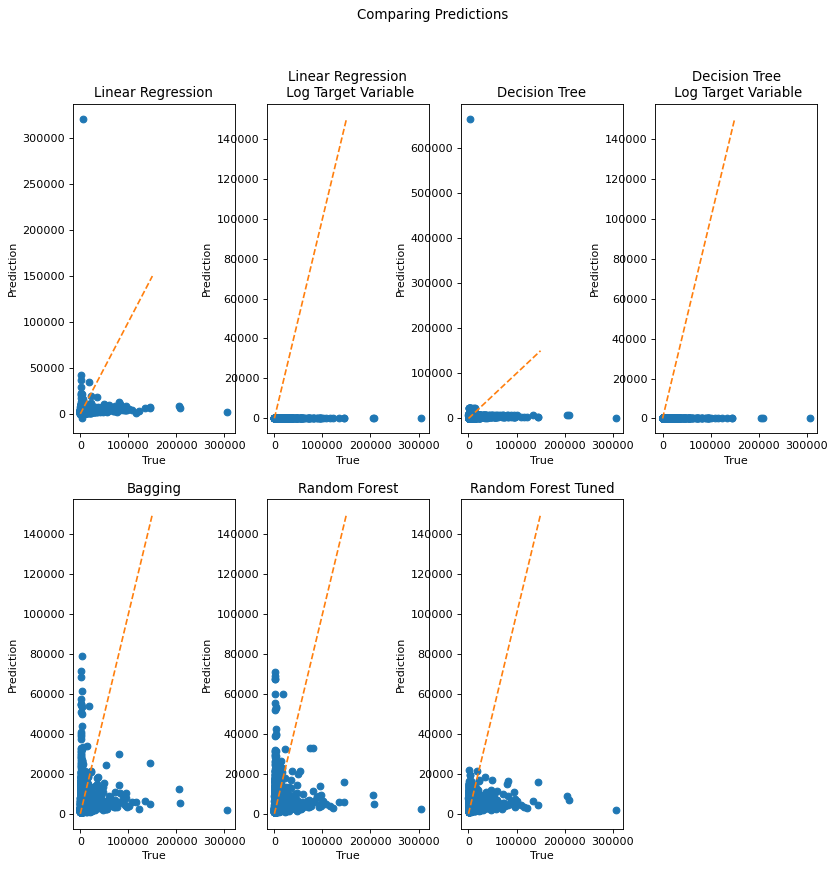

In [25]:
predictions=[pred_reg_model,pred_reg_model_log,pred_tree_model,pred_tree_model_log,pred_bagging,pred_rf,pred_rf_tuned]
names=['Linear Regression','Linear Regression\n Log Target Variable','Decision Tree','Decision Tree\n Log Target Variable',
      'Bagging','Random Forest','Random Forest Tuned']
figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
for i in range(len(predictions)):
    plt.subplot(2,4,i+1)
    plt.plot(test_Y,predictions[i],'o')
    plt.plot([0,150000],[0,150000],'--')
    plt.xlabel('True')
    plt.ylabel('Prediction')
    plt.title(names[i])
plt.suptitle('Comparing Predictions')

<p>We can see from this plot that predictions are not good at all. Nevertheless, we can assume that the random forest tuned is here the best model for making predictions. We are now going to compare the RMSE for each model
</p>

In [35]:
rmses=np.sqrt([mse_reg_model,mse_reg_model_log,mse_tree_model,mse_tree_model_log,bagging_model_mse,rf_model_rmse,rf_model_rmse_tuned])
metrics_reg={}
best_rmse=(10000000,None)
for i in range(len(rmses)):
    if rmses[i]<best_rmse[0]:
        best_rmse=(rmses[i],names[i])
    metrics_reg[names[i].replace('\n','')]={'RMSE':np.round(rmses[i],2)}
metrics_reg_df=pd.DataFrame(metrics_reg)
metrics_reg_df['Best Model']=best_rmse[1].replace('\n','')
metrics_reg_df

,Linear Regression,Linear Regression Log Target Variable,Decision Tree,Decision Tree Log Target Variable,Bagging,Random Forest,Random Forest Tuned,Best Model
RMSE,9305.03,10205.56,11407.04,8782.91,9147.9,9061.59,8553.93,Random Forest Tuned


<p style="text-align:justify">We can see here that the model that achieved the best RMSE is the Tuned Random Forest Regressor. It is interesting to highlight the fact that applying the log processing to the target variable helped the decision tree to improve its performance. Nevertheless, I tried to apply the same processing for building random forest and bagging regressors, it did not improve at all.</p> 

### Conclusion for regression models

<p style="text-align:justify">We have built different models, and tried to tune some of them, but we never performed a better RMSE than 8553, which is in fact very large regarding to the target variable range.(The real range is between 1 to 800k, but in fact more than 99% of the observations are in the range 1 to 90k)<br> 
We could try some other methods such as Gradient Boosting or Adaptative Boosting, but I am not sure we will improve this score a lot. We can conclude than regression tasks are not efficient for this dataset.<br>
We are now going to build some Binary Classifiers to see if we can get better results on this dataset. As we have already seen before, we have divided the response variable into two classes : popular articles that have been shared more than 1400 times, and unpopular articles that have been shared less than 1400 times. </p>

## Classification Models

### Logistic Regression

In [40]:
logreg_classifier=LogisticRegression(max_iter=10000000,random_state=0)
logreg_classifier.fit(train_X,train_Y_bool)
pred_logreg=logreg_classifier.predict(test_X)
log_reg_acc=accuracy_score(test_Y_bool,pred_logreg)
print('Accuracy of Logistic Regression Classifier : ',log_reg_acc)

Accuracy of Logistic Regression Classifier :  0.6097868583680162


<p>We can see that classification tasks performs better than regression tasks on this dataset. We can now see if scaling help to improve the accuracy of the logistic regression classifier</p> 

In [41]:
logreg_classifier_scaled = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
logreg_classifier_scaled.fit(train_X, train_Y_bool)
pred_logreg_scaled = logreg_classifier_scaled.predict(test_X)
log_reg_acc_scaled=accuracy_score(test_Y_bool,pred_logreg_scaled)
print('Accuracy of Logistic Regression Classifier With Scaled Data: ',log_reg_acc_scaled)

Accuracy of Logistic Regression Classifier With Scaled Data:  0.6540547357800479


<p> Scaling the dataset has helped to improve the accuracy by a 5% rate, which is a very good improvement. We can compare both models by plotting their Confusion Matrix</p>

Confusion Matrix Logistic Regression


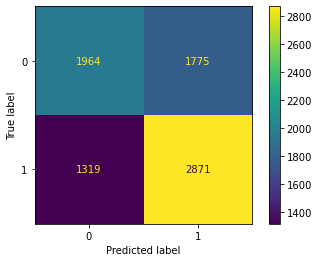

Confusion Matrix Logistic Regression With Scaled Data


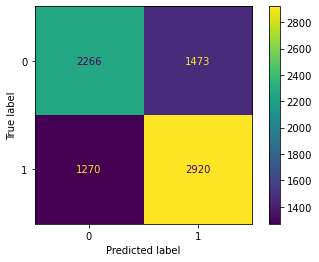

In [42]:
cm_logreg = confusion_matrix(test_Y_bool, pred_logreg)
print('Confusion Matrix Logistic Regression')
ConfusionMatrixDisplay(cm_logreg).plot()
plt.show()
cm_logreg_scaled = confusion_matrix(test_Y_bool, pred_logreg_scaled)
print('Confusion Matrix Logistic Regression With Scaled Data')
ConfusionMatrixDisplay(cm_logreg_scaled).plot()
plt.show()

<p>We can see that the logisitic regression classifier performs better to predict unpopular articles when the data is scaled.
We will now build Linear/Quadratic Discriminant Analysis classifiers to see if we can improve the accuracy of the logistic classifier.</p>

### LDA

<p>The LDA is a classifier which build a linear decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule. The model fits a Gaussian density to each class, assuming that all classes share the same covariance matrix.</p>

In [43]:
lda_classifier=LinearDiscriminantAnalysis()
lda_classifier.fit(train_X,train_Y_bool)
pred_lda=lda_classifier.predict(test_X)
lda_acc=accuracy_score(test_Y_bool,pred_lda)
print('Accuracy of LDA Classifier : ',lda_acc)

Accuracy of LDA Classifier :  0.6496405599697314


Confusion Matrix LDA


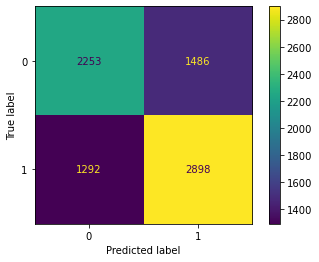

In [44]:
cm_lda = confusion_matrix(test_Y_bool, pred_lda)
print('Confusion Matrix LDA')
ConfusionMatrixDisplay(cm_lda).plot()
plt.show()

<p>We can see that the Logistic Regression classifier performs better for predicting both popular and unpopular articles than the LDA classifier. Nevertheless, the decision boudary between the two classes can be non-linear. We can try to build a QDA classifier which compute quadratic decision boudaries.</p>

### QDA

In [45]:
qda_classifier=QuadraticDiscriminantAnalysis()
qda_classifier.fit(train_X,train_Y_bool)
pred_qda=qda_classifier.predict(test_X)
qda_acc=accuracy_score(test_Y_bool,pred_qda)
print('Accuracy of QDA Classifier : ',qda_acc)

Accuracy of QDA Classifier :  0.594904779921806


C:\Users\sammy\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


<p style="text-align:justify">We can see that there is some multicollinearity in our dataset. Applying a PCA would help to remove this multicollinearity and to improve QDA classifier's performance. As we are now going to compute some tree-based classifiers, there is no need to compute the PCA. Even if the decision tree can be affected by the multicollinearity, Random Forests, Bagging and Gradient boosting techniques use Bootstrap techniques which is not affecting a lot by the multicollinearity.</p>

### Decision Tree

In [46]:
tree_classifier=DecisionTreeClassifier(max_depth=4)
tree_classifier.fit(train_X,train_Y_bool)
pred_tree_classifier=tree_classifier.predict(test_X)
tree_acc=accuracy_score(test_Y_bool,pred_tree_classifier)
print('Accuracy of Single Decision Tree Classifier : ',tree_acc)

Accuracy of Single Decision Tree Classifier :  0.635262958758986


Confusion Matrix Decision Tree


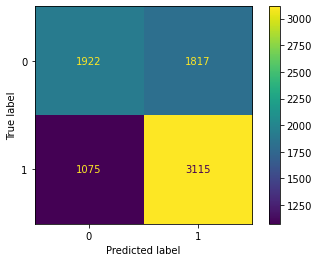

In [47]:
cm_tree = confusion_matrix(test_Y_bool, pred_tree_classifier)
print('Confusion Matrix Decision Tree')
ConfusionMatrixDisplay(cm_tree).plot()
plt.show()

<p style="text-align:justify">The Decision Tree Classifier seems to outperform the Logistic Classifier applied on unscaled data. Nevertheless, the accuracy is lower than the logistic classifier applied on scaled data. We can see from the confusion matrix that decision trees 
performs better on predicting popular articles, and logistic classifier performs better on predicting unpopular articles.<br>
As scaling does not affect tree-based classifiers results, we can try to build other models to improve the accuracy</p>

### Bagging

In [53]:
bagging_classifier=BaggingClassifier(max_features=train_X.shape[1], bootstrap=True, verbose=0)
bagging_classifier.fit(train_X,train_Y_bool)
pred_bagging_classifier=bagging_classifier.predict(test_X)
bagging_acc=accuracy_score(test_Y_bool,pred_bagging_classifier)
print('Accuracy of Bagging Classifier : ',bagging_acc)

Accuracy of Bagging Classifier :  0.6213898347837054


Confusion Matrix Bagging Classifier


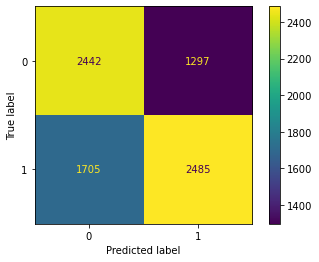

In [54]:
cm_bagging = confusion_matrix(test_Y_bool, pred_bagging_classifier)
print('Confusion Matrix Bagging Classifier')
ConfusionMatrixDisplay(cm_bagging).plot()
plt.show()

<p>The Bagging Model is the one who performed the best compared to logistic and decision tree classifiers.</p>

### Random Forests

In [62]:
rf_classifier=RandomForestClassifier(n_estimators=100, max_features='auto', bootstrap=True, verbose=0)
rf_classifier.fit(train_X,train_Y_bool)
pred_rf_classifier=rf_classifier.predict(test_X)
rf_acc=accuracy_score(test_Y_bool,pred_rf_classifier)
print('Accuracy of Random Forest Classifier : ',rf_acc)

Accuracy of Random Forest Classifier :  0.6611174170765545


Confusion Matrix Random Forest Classifier


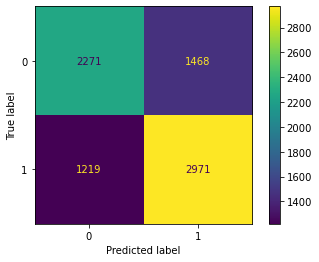

In [63]:
cm_rf = confusion_matrix(test_Y_bool, pred_rf_classifier)
print('Confusion Matrix Random Forest Classifier')
ConfusionMatrixDisplay(cm_rf).plot()
plt.show()

<p> Until now, the random forest classifier is the classifier with the highest accuracy, 0.66 which is a good improvement from the first logistic regression classifier. It could be interesting to tune its parameters, to find ones which achieve the best accuracy</p>

### Random Forest Parameters Tuning

<p style="font-style:justify">To tune the Random Forest Classifier, we have to set for each hyperparameter the range of values we want to try. Using a k-fold cross validation, we will able to find the hyperparameters that leads to the best accuracy for our dataset</p>

#### Setting up the grid

In [14]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 10)]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2, 4]
bootstrap = [True]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500], 'max_features': ['log2', 'sqrt'], 'max_depth': [5, 7, 10, 13, 16, 18, 21, 24, 27, 30], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True]}


#### Model fitting

<p>Here, we have to select the number of iteration to perform (which is in fact the number of hyperparameters combinations to try) and the number of folds to use for cross validation. To achieve the higher performance, we have to set this parameters as high as possible, but it leads to a high computational time. Here the trade off we have choosen is n_iter=30 and 3-fold cv.</p>

In [15]:
rf_classifier = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf_classifier, param_distributions = random_grid, n_iter = 30, cv = 3, verbose=2, random_state=0, n_jobs = -1)
rf_random.fit(train_X, train_Y_bool)
print('Best Parameters Found for the Random Forest Classifier')
print(rf_random.best_params_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  7.4min finished


Best Parameters Found for the Random Forest Classifier
{'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': True}


<p>Best Parameters Found for the Random Forest Classifier
{'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': True}</p>

<p>Now we have found the optimal parameters, we can now concentrate our search. We will specify every combination of settings to try using GridSearchCV, a method that evaluates all combinations we define instead of choosing randomly some combinations</p>

In [37]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [30, 40, 50],
    'max_features': ['log2'],
    'min_samples_leaf': [4],
    'min_samples_split': [5],
    'n_estimators': [500, 1000]
}
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(train_X, train_Y_bool)
print('Best Parameters Found for the Random Forest Classifier :')
print(grid_search.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:  3.1min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  3.8min finished


Best Parameters Found for the Random Forest Classifier :
{'bootstrap': True, 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 1000}


<p>Now the tuning has finished, we have the optimal parameters for the random forest classifier. Let's re-build our Random Forest Classifier and see if the accuracy has been improved.</p>

#### Random Forest Classifier (Best Hyperparameters)

In [57]:
best_params={'bootstrap': True, 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 500}
rf_classifier_tuned=RandomForestClassifier(**best_params)
rf_classifier_tuned.fit(train_X,train_Y_bool)
pred_rf_classifier_tuned=rf_classifier_tuned.predict(test_X)
rf_acc_tuned=accuracy_score(test_Y_bool,pred_rf_classifier_tuned)
print('Accuracy of Random Forest Classifier Tuned : ',rf_acc_tuned)

Accuracy of Random Forest Classifier Tuned :  0.6710808424769832


<p>We can see that the accuracy of the Random Forest Classifier has been improved from 0.6611 to 0.6710, which is an improvement of 1%. Let's now see if we can improve it using the gradient boosting classifier</p>

### Gradient Boosting

<p>In RF and Bagging, the average is used to reduce variance. In boosting, it follows the same pattern with a sequential method. Each new tree is grown using information from previously grown trees. Unlike RF and bagging, boosting method learns slowly, avoiding overfitting.</p>

In [64]:
gb_classifier=GradientBoostingClassifier()
gb_classifier.fit(train_X,train_Y_bool)
pred_gb_classifier=gb_classifier.predict(test_X)
gb_acc=accuracy_score(test_Y_bool,pred_gb_classifier)
print('Accuracy of Gradient Boosting Classifier : ',gb_acc)

Accuracy of Gradient Boosting Classifier :  0.6703241266237862


Confusion Matrix Gradient Boosting Classifier


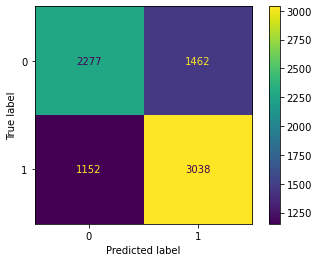

In [65]:
cm_gb = confusion_matrix(test_Y_bool, pred_gb_classifier)
print('Confusion Matrix Gradient Boosting Classifier')
ConfusionMatrixDisplay(cm_gb).plot()
plt.show()

<p>We can see that the Gradient Boosting Classifier outperformed the Tuned Random Forest Classifier. For Gradient Boosting, we can plot the log-loss value for each computed tree to vizualise the learning</p>

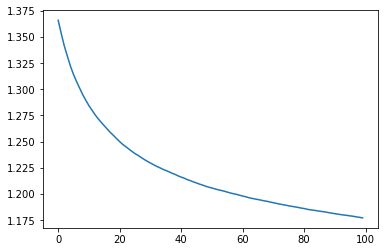

In [66]:
plt.plot(gb_classifier.train_score_)

<p>Following the same patterns than for the random forest, wa can try to tune it in order the get the optimal hyperparameters</p>

### Gradient Boosting Tuning

<p>Note that tuning parameters has an extremely high computational time. This explains why number of parameters I have choosen is very low. Using a more performant CPU would help to increase the number of cv and iterations</p>

In [13]:
learning_rate = [0.1,0.5,1.0]
n_estimators=[int(x) for x in np.linspace(200, 800, num = 4)]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2, 4]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 10)]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'learning_rate': learning_rate}
print(random_grid)

{'n_estimators': [200, 400, 600, 800], 'max_features': ['log2', 'sqrt'], 'max_depth': [5, 7, 10, 13, 16, 18, 21, 24, 27, 30], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2, 4], 'learning_rate': [0.1, 0.5, 1.0]}


In [14]:
gb_classifier = GradientBoostingClassifier()
gb_random = RandomizedSearchCV(estimator = gb_classifier, param_distributions = random_grid, n_iter = 20, cv = 2, verbose=2, random_state=0, n_jobs = -1)
gb_random.fit(train_X, train_Y_bool)
print('Best Parameters Found for the Gradient Boosting Classifier')
print(gb_random.best_params_)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 13.9min finished


Best Parameters Found for the Gradient Boosting Classifier
{'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 21, 'learning_rate': 0.1}


<p>Best Parameters Found : {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 21, 'learning_rate': 0.1}</p>

In [13]:
param_grid = {
    'learning_rate': [0.1],
    'max_depth': [21, 25],
    'max_features': ['sqrt'],
    'min_samples_leaf': [4],
    'min_samples_split': [5],
    'n_estimators': [400,500]
}
gb = GradientBoostingClassifier()
grid_search = GridSearchCV(estimator = gb, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(train_X, train_Y_bool)
print('Best Parameters Found for the Gradient Boosting Classifier :')
print(grid_search.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:  4.6min remaining:  9.2min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  8.4min finished


Best Parameters Found for the Gradient Boosting Classifier :
{'learning_rate': 0.1, 'max_depth': 21, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 500}


<p>
Best Parameters Found for the Gradient Boosting Classifier :
{'learning_rate': 0.1, 'max_depth': 21, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 500}<br> 
Now we have our optimal parameters, we can re-build the classifier to see if the accuracy has been improved</p>

In [67]:
best_params={'learning_rate': 0.1, 'max_depth': 21, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 500}
gb_classifier_tuned=GradientBoostingClassifier(**best_params)
gb_classifier_tuned.fit(train_X,train_Y_bool)
pred_gb_classifier_tuned=gb_classifier_tuned.predict(test_X)
gb_acc_tuned=accuracy_score(test_Y_bool,pred_gb_classifier_tuned)
print('Accuracy of Gradient Boosting Classifier Tuned : ',gb_acc_tuned)

Accuracy of Gradient Boosting Classifier Tuned :  0.6694412914617228


<p>We can see that tuning the Gradient Boosting did not helped to improve the accuracy. It maybe due to the lack of random combinations tested by the randomized search.
We will now try another model which is Adaptative Boosting Classifier</p>

### AdaBoost 

<p>The main difference between Gradient Boosting and Adaptative Boosting is that AdaBoost will randomly generate a set of weak learner before the real learning process. It will learn the weights of each learner by predicting a sample correctly or not. If a learner is mispredict a sample, the weight of the learner is reduced a bit. It will repeat until convergence.</p>

In [68]:
adb_classifier=AdaBoostClassifier()
adb_classifier.fit(train_X,train_Y_bool)
pred_adb_classifier=adb_classifier.predict(test_X)
adb_acc=accuracy_score(test_Y_bool,pred_adb_classifier)
print('Accuracy of Adaptative Boosting Classifier : ',adb_acc)

Accuracy of Adaptative Boosting Classifier :  0.657459957119435


Confusion Matrix Adaptative Boosting Classifier


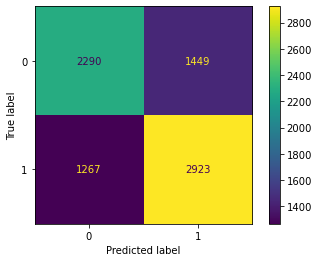

In [69]:
cm_adb = confusion_matrix(test_Y_bool, pred_adb_classifier)
print('Confusion Matrix Adaptative Boosting Classifier')
ConfusionMatrixDisplay(cm_adb).plot()
plt.show()

<p>We can see that the adaptative boosting classifier did not performed better than the gradient boosting classifier. As for the previous models, we are going to tune its hyperparameters to see if we can improve the accuracy.</p>

### AdaBoost Tuning

In [14]:
learning_rate = [0.1,0.5,1.0]
n_estimators=[int(x) for x in np.linspace(200, 1000, num = 5)]
algorithm = ['SAMME', 'SAMME.R']

random_grid = {'n_estimators': n_estimators,
                'algorithm':algorithm,
               'learning_rate': learning_rate}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000], 'algorithm': ['SAMME', 'SAMME.R'], 'learning_rate': [0.1, 0.5, 1.0]}


In [15]:
adb_classifier = AdaBoostClassifier()
adb_random = RandomizedSearchCV(estimator = adb_classifier, param_distributions = random_grid, n_iter = 20, cv = 2, verbose=2, random_state=0, n_jobs = -1)
adb_random.fit(train_X, train_Y_bool)
print('Best Parameters Found for the Adaptative Boosting Classifier')
print(adb_random.best_params_)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  6.2min finished


Best Parameters Found for the Adaptative Boosting Classifier
{'n_estimators': 1000, 'learning_rate': 1.0, 'algorithm': 'SAMME'}


In [17]:
param_grid = {
    'learning_rate': [0.5,1.0],
    'algorithm': ['SAMME','SAMME.R'],
    'n_estimators': [1000]
}
adb = AdaBoostClassifier()
grid_search = GridSearchCV(estimator = adb, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(train_X, train_Y_bool)
print('Best Parameters Found for the Adaptative Boosting Classifier :')
print(grid_search.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:  2.4min remaining:  4.8min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  4.1min finished


Best Parameters Found for the Adaptative Boosting Classifier :
{'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 1000}


<p>
Best Parameters Found for the Adaptative Boosting Classifier :
{'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 1000}<br>
Now we have our optimal hyperparameters, we will now re-build the AdaBoost Classifier in order to see if we achieve a better accuracy</p>

In [70]:
best_params={'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 1000}
adb_classifier_tuned=AdaBoostClassifier(**best_params)
adb_classifier_tuned.fit(train_X,train_Y_bool)
pred_adb_classifier_tuned=adb_classifier_tuned.predict(test_X)
adb_acc_tuned=accuracy_score(test_Y_bool,pred_adb_classifier_tuned)
print('Accuracy of Adaptative Boosting Classifier Tuned : ',adb_acc_tuned)

Accuracy of Adaptative Boosting Classifier Tuned :  0.6618741329297515


<p>Tuning the AdaBoost classifier helped to increase the final accuracy by 0.3%. Nevertheless, the gradient boosting is still the best classifier for our dataset.<br>
Let's finally build our last model, which is KNN Classifier</p>
</p>

### KNN

<p>The KNN Classifier is a distance-based classifier. For each point P, it predict the label that appears the most among the k-nearest points of P. The distance type can be changed, and the default type is the euclidian distance</p>

In [71]:
knn_classifier=KNeighborsClassifier(n_jobs=-1)
knn_classifier.fit(train_X,train_Y_bool)
pred_knn_classifier=knn_classifier.predict(test_X)
knn_acc=accuracy_score(test_Y_bool,pred_knn_classifier)
print('Accuracy of KNN Classifier : ',knn_acc)

Accuracy of KNN Classifier :  0.5792659856223988


Confusion Matrix KNN Classifier


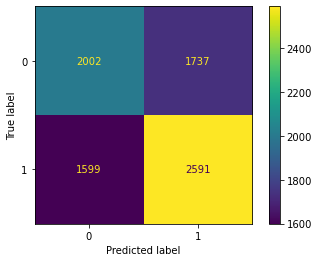

In [72]:
cm_knn = confusion_matrix(test_Y_bool, pred_knn_classifier)
print('Confusion Matrix KNN Classifier')
ConfusionMatrixDisplay(cm_knn).plot()
plt.show()

<p>We an see that the KNN classifier does not perform a very large accuracy. As the data is very sparse, we could scale it and re-build the model to see if any improvement will be done</p>

In [73]:
knn_classifier_scaled = make_pipeline(StandardScaler(), KNeighborsClassifier(n_jobs=-1))
knn_classifier_scaled.fit(train_X, train_Y_bool)
pred_knn_scaled = knn_classifier_scaled.predict(test_X)
knn_acc_scaled=accuracy_score(test_Y_bool,pred_knn_scaled)
print('Accuracy of KNN Classifier With Scaled Data: ',knn_acc_scaled)

Accuracy of KNN Classifier With Scaled Data:  0.6080211880438895


Confusion Matrix KNN Classifier With Scaled Data


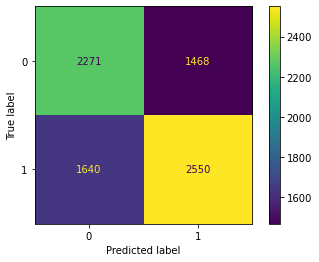

In [74]:
cm_knn_scaled = confusion_matrix(test_Y_bool, pred_knn_scaled)
print('Confusion Matrix KNN Classifier With Scaled Data')
ConfusionMatrixDisplay(cm_knn_scaled).plot()
plt.show()

<p>We can see that scaling first the data helped to improve the accuracy by a 3% rate, which is a good improvement. We can now tune the classifier and see if we get a better accuracy</p>

### Tuning KNN

In [35]:
n_neighbors=[int(x) for x in np.linspace(5, 23, num = 10)]
algorithm = ['auto', 'ball_tree','kd_tree','brute']
p=[1,2]
random_grid = {'kneighborsclassifier__n_neighbors': n_neighbors,
                'kneighborsclassifier__algorithm':algorithm,
               'kneighborsclassifier__p': p}
print(random_grid)

{'kneighborsclassifier__n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19, 21, 23], 'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'kneighborsclassifier__p': [1, 2]}


In [36]:
knn_classifier = make_pipeline(StandardScaler(), KNeighborsClassifier())
knn_random = RandomizedSearchCV(estimator = knn_classifier, param_distributions = random_grid, n_iter = 30, cv = 2, verbose=2, n_jobs = -1)
knn_random.fit(train_X, train_Y_bool)
print('Best Parameters Found for the KNN Classifier')
print(knn_random.best_params_)

Fitting 2 folds for each of 30 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 11.6min finished


Best Parameters Found for the KNN Classifier
{'kneighborsclassifier__p': 1, 'kneighborsclassifier__n_neighbors': 21, 'kneighborsclassifier__algorithm': 'ball_tree'}


In [37]:
param_grid = {
    'kneighborsclassifier__n_neighbors': [19,21,23],
    'kneighborsclassifier__algorithm': ['ball_tree','auto'],
    'kneighborsclassifier__p': [1,2]
}
knn_classifier = make_pipeline(StandardScaler(), KNeighborsClassifier())
grid_search = GridSearchCV(estimator = knn_classifier, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(train_X, train_Y_bool)
print('Best Parameters Found for the KNN Classifier :')
print(grid_search.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  7.5min finished


Best Parameters Found for the KNN Classifier :
{'kneighborsclassifier__algorithm': 'ball_tree', 'kneighborsclassifier__n_neighbors': 23, 'kneighborsclassifier__p': 1}


<p>
Now we have found the best parameters for the KNN Classifier, let's re-build the model with these optimal parameters to see if the accuracy has been improved</p>

In [39]:
best_params={'algorithm': 'ball_tree', 'n_neighbors': 23, 'p': 1}
knn_classifier_tuned = make_pipeline(StandardScaler(), KNeighborsClassifier(n_jobs=-1,**best_params))
knn_classifier_tuned.fit(train_X, train_Y_bool)
pred_knn_tuned = knn_classifier_tuned.predict(test_X)
knn_acc_tuned=accuracy_score(test_Y_bool,pred_knn_tuned)
print('Accuracy of Tuned KNN Classifier With Scaled Data: ',knn_acc_tuned)

Accuracy of Tuned KNN Classifier With Scaled Data:  0.637280867700845


<p>Both scaling and tuning the classifier helped to improve its accuracy by a 6% range, which is a very good improvement. Nevertheless, the gradient boosting tuned and the random forest tuned outperform the KNN, achieving an accuracy higher than 0.67.</p>

### Comparing Classifiers

<p style="text-align:justify">After building classifiers, we will now compare them to see which one has the best performance. There are a lot of vizualisations that we could plot to compare them. First, we could plot the predictions colored according to their labels. The problem is that we have a lot a features, which results to a large number of dimensions : this plot won't be reasonable. 
<br>
Another good way to compare classifiers performance is plotting the ROC Curve for each model. The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR). Classifiers that give curves closer to the top-left corner indicate a better performance. Let's see what we get for each classifier </p>

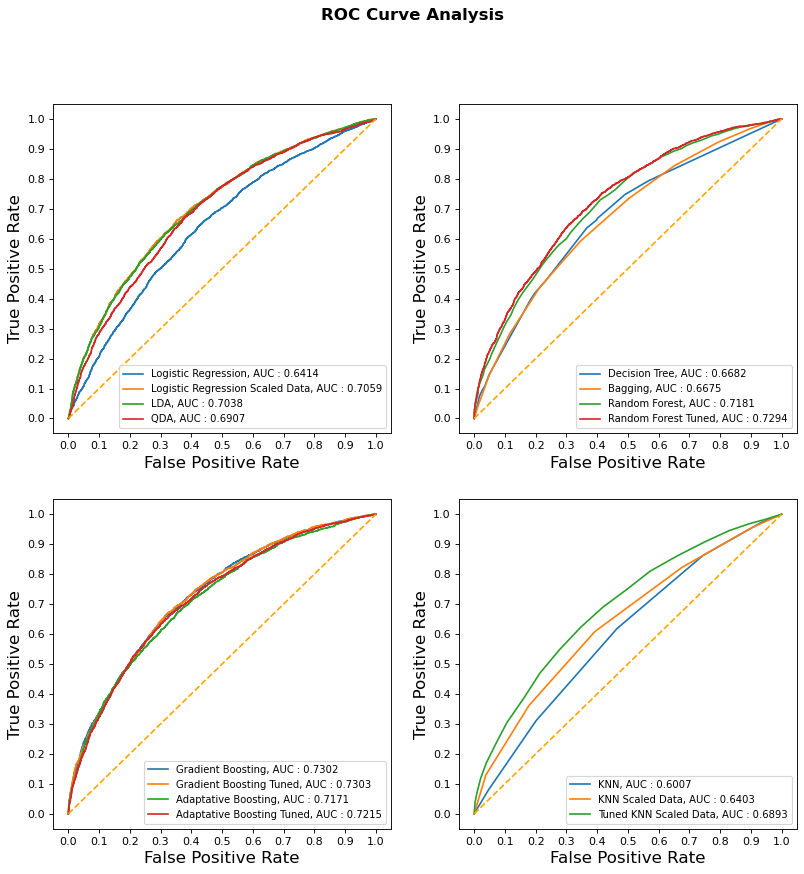

In [76]:
clf=[logreg_classifier,logreg_classifier_scaled,lda_classifier,qda_classifier,tree_classifier,bagging_classifier,rf_classifier,rf_classifier_tuned,
     gb_classifier,gb_classifier_tuned,adb_classifier,adb_classifier_tuned,knn_classifier,knn_classifier_scaled,knn_classifier_tuned]
names=['Logistic Regression','Logistic Regression Scaled Data','LDA','QDA','Decision Tree','Bagging','Random Forest',
      'Random Forest Tuned','Gradient Boosting','Gradient Boosting Tuned','Adaptative Boosting','Adaptative Boosting Tuned','KNN','KNN Scaled Data','Tuned KNN Scaled Data']
figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
for j in range(4):
    plt.subplot(2,2,j+1)
    for i in range(j*4,(j+1)*4):
        if i>14:
            break
        yproba = clf[i].predict_proba(test_X)[::,1]
        fpr, tpr, _ = roc_curve(test_Y_bool,  yproba)
        auc = roc_auc_score(test_Y_bool, yproba)
        plt.plot(fpr,tpr,label="{}, AUC : {}".format(names[i],np.round(auc,4)))    
    plt.plot([0,1], [0,1], color='orange', linestyle='--')
    plt.xticks(np.arange(0.0, 1.1, step=0.1))
    plt.xlabel("False Positive Rate", fontsize=15)
    plt.yticks(np.arange(0.0, 1.1, step=0.1))
    plt.ylabel("True Positive Rate", fontsize=15)
    plt.legend(prop={'size':9}, loc='lower right')
plt.suptitle('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.show()



<p>These ROC curves plots give us a good idea of each model's performance. We can see that the best model is the Gradient Boosting Tuned, with an AUC of 0.7303. </p>

We can finally print the evaluation metrics for each classifier. Here is a summary of these metrics

In [77]:
predictions=[pred_logreg,pred_logreg_scaled,pred_lda,pred_qda,pred_tree_classifier,pred_bagging_classifier,pred_rf_classifier,
             pred_rf_classifier_tuned,pred_gb_classifier,pred_gb_classifier_tuned,pred_adb_classifier,pred_adb_classifier_tuned,pred_knn_classifier,pred_knn_scaled,pred_knn_tuned]
metrics={}
best_acc=(0,None)
best_f1=(0,None)
best_precision=(0,None)
best_recall=(0,None)
for i in range(len(predictions)):
    acc=accuracy_score(test_Y_bool,predictions[i])
    if acc>best_acc[0]:
        best_acc=(acc,names[i])
    f1=f1_score(test_Y_bool,predictions[i])
    if f1>best_f1[0]:
        best_f1=(f1,names[i])
    precision=precision_score(test_Y_bool,predictions[i])
    if precision>best_precision[0]:
        best_precision=(precision,names[i])
    recall=recall_score(test_Y_bool,predictions[i])
    if recall>best_recall[0]:
        best_recall=(recall,names[i])
    metrics[names[i]]={'Accuracy':acc,'F1':f1,'Precision':precision,'Recall':recall}

summary=pd.DataFrame(metrics)
summary['Best Model']=[best_acc[1],best_f1[1],best_precision[1],best_recall[1]]
summary

,Logistic Regression,Logistic Regression Scaled Data,LDA,QDA,Decision Tree,Bagging,Random Forest,Random Forest Tuned,Gradient Boosting,Gradient Boosting Tuned,Adaptative Boosting,Adaptative Boosting Tuned,KNN,KNN Scaled Data,Tuned KNN Scaled Data,Best Model
Accuracy,0.609787,0.654055,0.649641,0.594905,0.635263,0.621390,0.661117,0.671081,0.670324,0.669441,0.657460,0.661874,0.579266,0.608021,0.637281,Random Forest Tuned
F1,0.649842,0.680415,0.675997,0.494014,0.682964,0.623432,0.688608,0.703636,0.699194,0.696959,0.682784,0.688365,0.608359,0.621345,0.644851,Random Forest Tuned
Precision,0.617951,0.664694,0.661040,0.726599,0.631590,0.657060,0.669295,0.671584,0.675111,0.675936,0.668573,0.670972,0.598660,0.634644,0.668117,QDA
Recall,0.685203,0.696897,0.691647,0.374224,0.743437,0.593079,0.709069,0.738902,0.725060,0.719332,0.697613,0.706683,0.618377,0.608592,0.623150,Decision Tree


This Dataframe shows the evaluation Metrics for each model.<br> <br>
<strong>Accuracy</strong>
<p style='text-align:justify'>We can see that the best accuracy is achieved by the Random Forest Tuned, which infers that if we want to maximize true predictions, the model to use will be the Random Forest Tuned Classifier. </p><br>
<strong>Precision</strong>
<p style='text-align:justify'>The best Precision score is achieved by the QDA, which infers that if we want a low false positive rate, the QDA will be the model to use. In fact, in our dataset, it is interesting if we want to be sure that each feature leading to a popular article will be precise.</p><br>
<strong>Recall</strong>
<p style='text-align:justify'>The best Sensitivity score is achieved by the decision tree, which answers to the question : of all the article which are popular, how many did we correctly labeled ?</p><br>
<strong>F1</strong>
<p style='text-align:justify'>Finally, the best F1 score is achieved by the Random Forest Tuned. The F1 score is a better measure to use than the accuracy if the cost of false positive and false negative is not the same and there is an uneven class distribution. In our case, the class distribution is uneven, but there is no balance to seek between precision and recall. We can actually compare our models using the accuracy.</p><br>

### Classifiers Conclusion

<p style='text-align:justify'>In this part we have built lots of binary classifiers in order to predict whether or not an article will be popular regarding to several features. We achieved best accuracies with tuned random forest and gradient boosting. 
These models will be those we are going to use for deployment. 
We can finally conclude by assessing that classification tasks performs better than regression tasks on this dataset. Perhaps using Deep Learning Methods could leads to better models for predicting the target variable.</p>